# Practice notebook for confidence intervals using NHANES data

This notebook will give you the opportunity to practice working with confidence intervals using the NHANES data.

You can enter your code into the cells that say "enter your code here", and you can type responses to the questions into the cells that say "Type Markdown and Latex".

Note that most of the code that you will need to write below is very similar to code that appears in the case study notebook.  You will need to edit code from that notebook in small ways to adapt it to the prompts below.

To get started, we will use the same module imports and read the data in the same way as we did in the case study:

In [242]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm

da = pd.read_csv("..\..\\nhanes_2015_2016.csv")
da.shape
da['DMDMARTL'].isnull().sum()
da['RIAGENDR'].isnull().sum()
da['DMDEDUC2'].isnull().sum()

261

## Question 1

Restrict the sample to women between 35 and 50, then use the marital status variable [DMDMARTL](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#DMDMARTL) to partition this sample into two groups - women who are currently married, and women who are not currently married.  Within each of these groups, calculate the proportion of women who have completed college.  Calculate 95% confidence intervals for each of these proportions.

In [293]:
# enter your code here
da["DMDMARTLx"] = da['DMDMARTL'].replace({1: "Married", 2: "Not Married", 3: "Not Married", 4: "Not Married", 5: "Not Married",
                                         6: "Not Married", 77:"Not Married" , 99:"Not Married"})
da['RIAGENDRx'] = da['RIAGENDR'].replace({1: "Male", 2:"Female"})
da['DMDEDUC2x'] = da['DMDEDUC2'].replace({1: "No college", 2: "No college", 3: "No college", 4: "No college", 5: "College",
                                   7:"No college", 9:"No college"})
da['AGEGRP'] = pd.cut(da['RIDAGEYR'], [10,20,30,40,50,60,70,80] ) # Create age strata based on these cut points


df = da.dropna(subset=['DMDMARTL', 'DMDEDUC2'])
df=df[(df['RIAGENDRx'] == "Female") & (df['RIDAGEYR']>=35) & (df['RIDAGEYR']<=50)]
print(df.shape)

gb = df.groupby(['DMDMARTLx'])['DMDEDUC2x'].agg(
        Sample_size        = np.size,
        College_count      = lambda x: np.sum (x == 'College'), 
        College_proportion = lambda x: np.mean(x =='College')
      )

n_married = gb["Sample_size"]["Married"]        # Total number of married women
p_married = gb["College_proportion"]["Married"] # Married women w/college proportion
std_married = np.sqrt(p_married * (1 - p_married) / n_married)

lcb_married  = p_married - 1.96 * std_married  
ucb_married  = p_married + 1.96 * std_married

n_not_married = gb["Sample_size"]["Not Married"]        # Total number of non married women
p_not_married = gb["College_proportion"]["Not Married"] # Non Married women w/college proportion
std_not_married = np.sqrt(p_not_married * (1 - p_not_married) / n_not_married)

lcb_not_married  = p_not_married - 1.96 * std_not_married  
ucb_not_married  = p_not_married + 1.96 * std_not_married

print(gb)
print(f"""\nMarried total: {n_married:>20.3f}
Married proportion: {p_married:>15.3f}
Married standard error: {std_married:>11.3f}
lcb:{lcb_married:>10.3f}\nucb:{ucb_married:>10.3f}""")

print(f"""\nNot Married total: {n_not_married:>20.3f}
Not Married proportion: {p_not_married:>15.3f}
Not Married standard error: {std_not_married:>11.3f}
lcb:{lcb_not_married:>10.3f}\nucb:{ucb_not_married:>10.3f}""")


(787, 33)
             Sample_size  College_count  College_proportion
DMDMARTLx                                                  
Married              449            162            0.360802
Not Married          338             72            0.213018

Married total:              449.000
Married proportion:           0.361
Married standard error:       0.023
lcb:     0.316
ucb:     0.405

Not Married total:              338.000
Not Married proportion:           0.213
Not Married standard error:       0.022
lcb:     0.169
ucb:     0.257


__Q1a.__ Identify which of the two confidence intervals is wider, and explain why this is the case. 


The confidence intervals are almost identical. The difference in width will be determined by the standard error. And in this case the std is identical

__Q1b.__ Write 1-2 sentences summarizing these findings for an audience that does not know what a confidence interval is (the goal here is to report the substance of what you learned about how marital status and educational attainment are related, not to teach a person what a confidence interval is).

From the data with 95% confidence we can infer that the proportion of women married with a college degree is between 31% and 40% with the sample proportion being 36%.
Equally with 95% confidence we can infer that the proportion of women not married with a college degree is between 17% and 25% with the sample proportion being 21%.

## Question 2

Construct a 95% confidence interval for the proportion of smokers who are female. Construct a 95% confidence interval for the proportion of smokers who are male. Construct a 95% confidence interval for the **difference** between those two gender proportions.

In [272]:
# enter your code here

da['SMQ020x'] = da['SMQ020'].replace({1: "Yes", 2:"No", 7:"No", 9:"No",})
df = da.dropna(subset=['SMQ020'])

print(df.shape)

gb = df.groupby(['RIAGENDRx'])['SMQ020x'].agg(
        Sample_size        = np.size,
        Smokers_count      = lambda x: np.sum (x == 'Yes'), 
        Smokers_proportion = lambda x: np.mean(x =='Yes')
      )

n_female = gb["Sample_size"]["Female"]                # Total number of female
p_female_smokers = gb["Smokers_proportion"]["Female"] # Female smokers proportion
std_female_smokers = np.sqrt(p_female_smokers * (1 - p_female_smokers) / n_female)
lcb_female_smokers  = p_female_smokers - 1.96 * std_female_smokers  
ucb_female_smokers  = p_female_smokers + 1.96 * std_female_smokers

n_male = gb["Sample_size"]["Male"]                      # Total number of male
p_male_smokers   = gb["Smokers_proportion"]["Male"]     # Male smokers proportion
std_male_smokers = np.sqrt(p_male_smokers * (1 - p_male_smokers) / n_male)
lcb_male_smokers  = p_male_smokers - 1.96 * std_male_smokers  
ucb_male_smokers  = p_male_smokers + 1.96 * std_male_smokers

p_diff = p_female_smokers - p_male_smokers
std_diff = np.sqrt((p_female_smokers * (1 - p_female_smokers) / n_female)+(p_male_smokers * (1 - p_male_smokers) / n_male))
lcb_diff = p_diff - 1.96 * std_diff  
ucb_diff  = p_diff + 1.96 * std_diff
                   
print(gb)
print(f"""\nFemale total: {n_female:>20.3f}
Female smokers proportion: {p_female_smokers:>15.3f}
Female smokers standard error: {std_female_smokers:>11.3f}
lcb:{lcb_female_smokers:>10.3f}\nucb:{ucb_female_smokers:>10.3f}""")

print(f"""\nMale total: {n_male:>20.3f}
Male smokers proportion: {p_male_smokers:>15.3f}
Male smokers standard error: {std_male_smokers:>11.3f}
lcb:{lcb_male_smokers:>10.3f}\nucb:{ucb_male_smokers:>10.3f}""")
                   
print(f"""\n
Female-Male diff proportion: {p_diff:>15.3f}
Female-Male diff standard error: {std_diff:>11.3f}
lcb:{lcb_diff:>10.3f}\nucb:{ucb_diff:>10.3f}""")

(5735, 33)
           Sample_size  Smokers_count  Smokers_proportion
RIAGENDRx                                                
Female            2976            906            0.304435
Male              2759           1413            0.512142

Female total:             2976.000
Female smokers proportion:           0.304
Female smokers standard error:       0.008
lcb:     0.288
ucb:     0.321

Male total:             2759.000
Male smokers proportion:           0.512
Male smokers standard error:       0.010
lcb:     0.493
ucb:     0.531


Female-Male diff proportion:          -0.208
Female-Male diff standard error:       0.013
lcb:    -0.233
ucb:    -0.183


__Q2a.__ Why might it be relevant to report the separate gender proportions **and** the difference between the gender proportions?

Given the difference between these two proportions we hypothesise that the difference in proportion is not zero.
Females and Males may not have the same smoking proportion 

__Q2b.__ How does the **width** of the confidence interval for the difference between the gender proportions compare to the widths of the confidence intervals for the separate gender proportions?

The width of the confidence internal  for the difference is wider as the std error of the difference is bigger

## Question 3

Construct a 95% interval for height ([BMXHT](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BMX_I.htm#BMXHT)) in centimeters.  Then convert height from centimeters to inches by dividing by 2.54, and construct a 95% confidence interval for height in inches.  Finally, convert the endpoints (the lower and upper confidence limits) of the confidence interval from inches to back to centimeters   

In [292]:
# enter your code here
df = da.dropna(subset=['BMXHT'])
df.shape

mean_height_cm  = np.mean(df['BMXHT'])
std_height_cm   = np.std(df['BMXHT'])
count_height = df['BMXHT'].count()

lcb_height_cm  = mean_height_cm - 1.96 * std_height_cm  
ucb_height_cm  = mean_height_cm + 1.96 * std_height_cm

mean_height_in  = np.mean(df['BMXHT'])/2.54
std_height_in   = np.std(df['BMXHT'])/2.54
count_height = df['BMXHT'].count()

lcb_height_in  = mean_height_in - 1.96 * std_height_in  
ucb_height_in  = mean_height_in + 1.96 * std_height_in
 
lcb_to_cm = lcb_height_in * 2.54
ucb_to_cm = ucb_height_in * 2.54
print(f"""\nHeight sample total: {count_height:>20.2f}
CM
Height mean : {mean_height_cm:>28.3f}
Height standard error: {std_height_cm:>18.3f}
lcb:{lcb_height_cm:>10.3f}\nucb:{ucb_height_cm:>10.3f}

IN
Height mean : {mean_height_in:>28.3f}
Height standard error: {std_height_in:>18.3f}
lcb:{lcb_height_in:>10.3f}\nucb:{ucb_height_in:>10.3f}

Conversion of ends to cm
lcb:{lcb_to_cm:>10.3f}\nucb:{ucb_to_cm:>10.3f}
""")


Height sample total:              5673.00
CM
Height mean :                      166.143
Height standard error:             10.078
lcb:   146.389
ucb:   185.896

IN
Height mean :                       65.411
Height standard error:              3.968
lcb:    57.634
ucb:    73.188

Conversion of ends to cm
lcb:   146.389
ucb:   185.896



__Q3a.__ Describe how the confidence interval constructed in centimeters relates to the confidence interval constructed in inches.

Is the same is only expressed in different units

## Question 4

Partition the sample based on 10-year age bands, i.e. the resulting groups will consist of people with ages from 18-28, 29-38, etc. Construct 95% confidence intervals for the difference between the mean BMI for females and for males within each age band.

In [322]:
# enter your code here
df = da.dropna(subset=['BMXBMI'])

print(df.shape)
pd.set_option('display.float_format','{:.2f}'.format)
pd.set_option('display.width',120)

gb = df.groupby(['AGEGRP','RIAGENDRx'])['BMXBMI'].agg(
        Sample_size  = np.size,
        Mean_BMI     = np.mean, 
        Std_BMI      = np.std
      ).unstack()

gb[('Mean_diff')] = gb[('Mean_BMI', 'Female')] - gb[('Mean_BMI', 'Male')]
gb[('Std_diff')]  = np.sqrt((gb[('Std_BMI', 'Female')]**2/gb[('Sample_size','Female')]) + (gb[('Std_BMI', 'Male')]**2/gb[('Sample_size','Male')]))
gb[('LCB')] = gb[('Mean_diff')] - 1.96 * gb[('Std_diff')]
gb[('UCB')] = gb[('Mean_diff')] + 1.96 * gb[('Std_diff')]
gb[('Width_interval')] =  gb[('UCB')] - gb[('LCB')]
print(gb)

(5662, 33)
          Sample_size        Mean_BMI       Std_BMI      Mean_diff Std_diff   LCB  UCB Width_interval
RIAGENDRx      Female   Male   Female  Male  Female Male                                             
AGEGRP                                                                                               
(10, 20]       160.00 175.00    26.44 26.23    6.97 7.02      0.21     0.77 -1.29 1.71           3.00
(20, 30]       511.00 426.00    28.42 27.71    7.87 6.58      0.71     0.47 -0.22 1.64           1.85
(30, 40]       469.00 452.00    30.33 29.61    8.32 6.62      0.71     0.49 -0.26 1.68           1.94
(40, 50]       498.00 398.00    31.16 29.72    8.08 6.41      1.44     0.48  0.49 2.38           1.90
(50, 60]       466.00 451.00    30.74 29.23    7.58 5.91      1.51     0.45  0.63 2.39           1.76
(60, 70]       437.00 426.00    31.07 29.39    7.60 5.93      1.68     0.46  0.77 2.59           1.82
(70, 80]       403.00 390.00    29.14 27.96    6.28 4.97      1.18     

__Q4a.__ How do the widths of these confidence intervals differ?  Provide an explanation for any substantial diferences in the confidence interval widths that you see.

The bigger the std the wider the interval. The width difference between interval is quite small and consistent with the exception of the first and the last age group. It suggests that the difference in BMI for these two different groups remains somewhat constant

## Question 5

Construct a 95% confidence interval for the first and second systolic blood pressure measures, and for the difference between the first and second systolic blood pressure measurements within a subject.

In [339]:
# enter code here
df = da.dropna(subset=['BPXSY1','BPXSY2'])
df = df[['BPXSY1','BPXSY2']]

count_sy1= np.size(df['BPXSY1'])
mean_sy1 = np.mean(df['BPXSY1'])
std_sy1  = np.std(df['BPXSY1'])/np.sqrt(count_sy1)
lcb_sy1  = mean_sy1 - 1.96 * std_sy1  
ucb_sy1  = mean_sy1 + 1.96 * std_sy1

count_sy2= np.size(df['BPXSY2'])
mean_sy2 = np.mean(df['BPXSY2'])
std_sy2  = np.std(df['BPXSY2'])/np.sqrt(count_sy2)
lcb_sy2  = mean_sy2 - 1.96 * std_sy1  
ucb_sy2  = mean_sy2 + 1.96 * std_sy1

mean_diff = mean_sy1 - mean_sy2
std_diff  = np.std(df['BPXSY1']-df['BPXSY2'])/(np.sqrt(count_sy1)-1)
lcb_diff  = mean_diff - 1.96 * std_diff  
ucb_diff  = mean_diff + 1.96 * std_diff

print(f"""\nSample total: {count_sy1:>13.3f}
Mean Systolic 1: {mean_sy1:>10.3f}
Std Systolic  1: {std_sy1:>10.3f}
lcb:{lcb_sy1:>10.3f}\nucb:{ucb_sy1:>10.3f}""")

print(f"""\nSample total: {count_sy2:>13.3f}
Mean Systolic 2: {mean_sy2:>10.3f}
Std Systolic  2: {std_sy2:>10.3f}
lcb:{lcb_sy2:>10.3f}\nucb:{ucb_sy2:>10.3f}""")

print(f"""\nSample total: {count_sy1:>16.3f}
Mean Systolic Diff: {mean_diff:>10.3f}
Std Systolic  Diff: {std_diff:>10.3f}
lcb:{lcb_diff:>10.3f}\nucb:{ucb_diff:>10.3f}""")


Sample total:      5369.000
Mean Systolic 1:    125.088
Std Systolic  1:      0.252
lcb:   124.594
ucb:   125.583

Sample total:      5369.000
Mean Systolic 2:    124.413
Std Systolic  2:      0.248
lcb:   123.919
ucb:   124.908

Sample total:         5369.000
Mean Systolic Diff:      0.675
Std Systolic  Diff:      0.070
lcb:     0.538
ucb:     0.812


__Q5a.__ Based on these confidence intervals, would you say that a difference of zero between the population mean values of the first and second systolic blood pressure measures is consistent with the data?

No is not. the difference of zero is not included in the confidence interval

__Q5b.__ Discuss how the width of the confidence interval for the within-subject difference compares to the widths of the confidence intervals for the first and second measures.

The std error is what determines the width. in the case of the difference between measurements taken the std error is small and the confidence interval width is also small compared to the confidence intervals for the first and the secnd measument

## Question 6

Construct a 95% confidence interval for the mean difference between the average age of a smoker, and the average age of a non-smoker.

In [357]:
# insert your code here
df = da.dropna(subset=['SMQ020'])

gb = df.groupby(['SMQ020x'])['RIDAGEYR'].agg(
        Sample_size  = np.size,
        Mean_age     = np.mean, 
        Std_age      = np.std
      )


gb.at['No','mean_age_diff'] = gb['Mean_age']['No'] - gb['Mean_age']['Yes']
gb.at['No','std_age_diff'] = np.sqrt((((gb['Sample_size']['No']-1)*(gb['Std_age']['No']**2))+((gb['Sample_size']['Yes']-1)*(gb['Std_age']['Yes']**2)))/(df['RIDAGEYR'].count()-2))
gb.at['No','LCB']  = gb['mean_age_diff']['No']  - 1.96 * gb['std_age_diff']['No']
gb.at['No','UCB']  = gb['mean_age_diff']['No']  + 1.96 * gb['std_age_diff']['No']

print(gb)

         Sample_size  Mean_age  Std_age  mean_age_diff  std_age_diff    LCB   UCB
SMQ020x                                                                          
No              3416     45.31    18.57          -6.79         18.13 -42.32 28.74
Yes             2319     52.10    17.46            nan           nan    nan   nan


__Q6a.__ Use graphical and numerical techniques to compare the variation in the ages of smokers to the variation in the ages of non-smokers.  

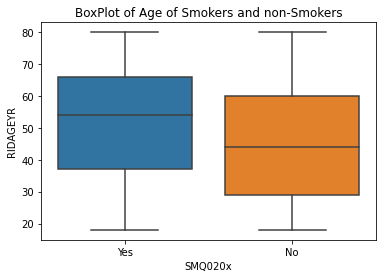

In [358]:
# insert your code here
sns.boxplot(x="SMQ020x", y="RIDAGEYR", data=df).set_title("BoxPlot of Age of Smokers and non-Smokers")
plt.show()

__Q6b.__ Does it appear that uncertainty about the mean age of smokers, or uncertainty about the mean age of non-smokers contributed more to the uncertainty for the mean difference that we are focusing on here?

It wil appear thaat the uncertainty comes from the non-smokers as the sample numbers are wider spread wider